In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import numpy as np
import os
from PIL import Image

plt.rcParams.update({
    #"font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 5,
})

## making gifs

In [18]:
sides = 3

# getting the images
def paths(sides, basis):
    return [f"./data/{sides}sides/{basis}_basis/{basis}{i}.png" for i in range(36)]


def imgs(sides):
    kpaths = paths(sides, "k")
    zpaths = paths(sides, "z")

    kimgs = [Image.open(path) for path in kpaths]
    zimgs = [Image.open(path) for path in zpaths]
    return kimgs, zimgs


kimgs, zimgs = imgs(sides)

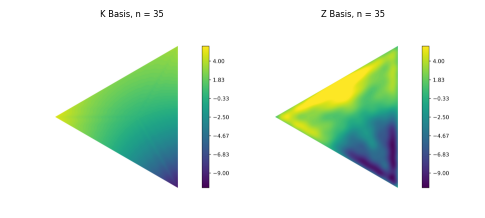

In [20]:
# making the plots
fig, ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(6,6),
)

plt.subplots_adjust(
    left=0.125,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=-0.1,
    hspace=0.2
)

for subplot in [0, 1]:
    ax[subplot].xaxis.set_visible(False)
    ax[subplot].yaxis.set_visible(False)
    ax[subplot].spines[['top', 'bottom', 'right', 'left']].set_visible(False)

order = 35

ax[0].set_title(f"K Basis, n = {order}")
ax[1].set_title(f"Z Basis, n = {order}")

imk = ax[0].imshow(kimgs[order], animated=True)
imz = ax[1].imshow(zimgs[order], animated=True)

In [ ]:
# update function
def update(order):
    imk.set_array(kimgs[order])
    imz.set_array(zimgs[order])
    
    ax[0].set_title(f"K Basis, n = {order}")
    ax[1].set_title(f"Z Basis, n = {order}")
    return imk, imz


# creating the gif
animation_fig = animation.FuncAnimation(
    fig,
    update,
    frames=len(kimgs),
    interval=200,
    blit=True,
    repeat_delay=10,
)

animation_fig.save(
    f"{sides}sides.gif",
#    dpi=600,
)

## plotting R$_\alpha$

In [ ]:
num_sides = 4
r0 = 1
alpha = np.pi / num_sides

def r_alpha(theta):
    sector = np.array((theta + alpha) / (2 * alpha), dtype=int)
    u_alpha = (theta - sector * 2 * alpha)
    return r0 * np.cos(alpha) / np.cos(u_alpha)

thetas = np.linspace(-alpha, 2 * np.pi - alpha, 1000)
rs = r_alpha(thetas)


# plotting
# gloop =  4 * 1.5
plt.figure(figsize=(7.5, 3))
plt.plot(thetas, rs, label=r"$R_{\alpha}$", c='r')
plt.xticks(
    ticks=np.pi * np.array([-1/4, 0, 1/4, 1/2, 1, 3/2, 7/4]),
    labels=[r"-$\pi$/4", r"0", r"$\pi$/4", r"$\pi$/2", r"$\pi$", r"3$\pi$/2", r"7$\pi$/4"]
)

# filling
glip = np.linspace(-alpha, alpha, 250)
glop = r_alpha(glip)

plt.fill_between(
    x=glip,
    y1=0,
    y2=glop,
    color='green',
    alpha=0.65,
    label="First Sector"
)

plt.ylim(0, 1.1)
#plt.xlim(-alpha - 0.2, 1.5 * alpha)
plt.grid(which="both")
plt.legend()

plt.xlabel(r"Polar Angle, $\theta$")
plt.ylabel(r"Outer Radius, $R_\alpha$")

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('presentations/square-ralpha.png', dpi=600)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

## cool zernike polynomials

## cool zernike polynomials on polygons